# Scikit-learn for logistic Regression

This is the same data as in Logistic Regression and Regularization Jupyter Notebook.<br>
In this version, we use scikit-learn to solve the same problem.<br>
Results are the same but it runs faster (less number of iteration)

Logistic Reg. Train accuracy: 83.1 %
Number of iteration: 16



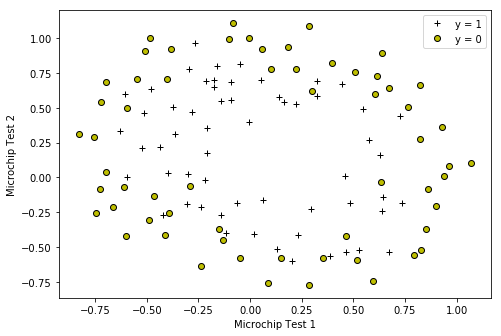

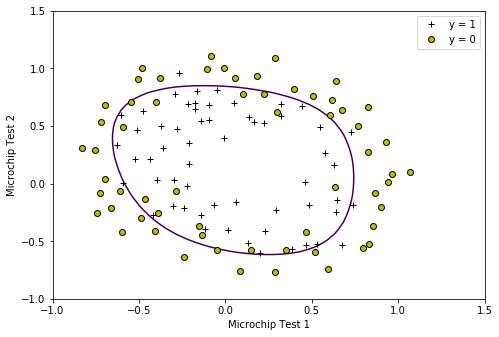

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


# plot data for training set
def plotData(E1, E2, y):
    fig_raw = plt.figure()
    ax = fig_raw.add_axes([0, 0, 1, 1 ])
    ax.plot( E1[y == True ], E2[y == True ], 'k+')
    ax.plot( E1[y == False ], E2[y == False ], 'ko', markerfacecolor='y')
    return ax

    
# add polynomial features built on top of existing pair of features
def mapFeatures(X1, X2, degree, addBias=False):
    # add vector bias
    out = np.ones(X1.shape)
    # add polynomes
    for i in range(1,degree+1, 1):
        for j in range(i+1):
            out = np.vstack( ( out, (np.power(X1,i-j)*np.power(X2,j)) ) )
    if addBias:
        return out.T
    else:
        # leave out bias (sklearn adds it)
        return out[1:,:].T


# plot decision boundary
def plotDecisionBoundary(RegObj, X, y, degree):
    # plot data first
    axd = plotData(X[:, 0], X[:, 1], y)
    if X.shape[1] <= 2 :
        # it's a line in this case so two points are enough for boundary
        plot_x = np.array([np.nanmin(X[:, 0])-2, np.nanmax(X[:, 0])+2])
        Coefficients = RegObj.coef_
        Bias = RegObj.intercept_
        plot_y = -(Bias[0] + plot_x*Coefficients[0][0]) / Coefficients[0][1]
        axd.plot(plot_x, plot_y)
    else:
        # create a grid to compute permutation with repetition
        u = np.linspace(-1, 1.5, 50)      
        Gu = np.tile(u, (u.shape[0], 1))
        # recover parameters (Theta/coefficients and bias/intercept)
        theta = np.insert( RegObj.coef_ , 0, RegObj.intercept_ )
        z = mapFeatures(Gu.flatten(), Gu.flatten('F'), degree, True).dot(theta)
        # must reshape to be a 2D array
        z = np.reshape( z, (u.shape[0],u.shape[0]) )
        # Notice you need to specify level 0 to plot only z=0  
        axd.contour(u, u, z, levels=[0],LineWidth=2)
        # In this case z contains 0's and 1's so contour has sharp edges
        
    return axd

# file needs to be located in the same directory as your python script
# OR add the full path with a single forward slash '/'
# OR full path with double back slash '\\'
# Single quotation marks for the file name, Double quotation marks works too!
# I needed to use floating point 64 bit to load numbers because each number has
# 14 decimals
data = np.loadtxt('ex2data2.txt', dtype = np.float64 , delimiter=',')

# slice data and plot function
# X = data[:, 0:2] DOES NOT WORK when using dtype dictionaries
# CAUTION when 0:2, it does not include 2!
X1 = data[:,0]
X2 = data[:,1]
y = data[:,2]


# plot data points
axes_raw = plotData(X1, X2, y)
axes_raw.set_xlabel('Microchip Test 1')
axes_raw.set_ylabel('Microchip Test 2')
axes_raw.legend(['y = 1', 'y = 0'])

# Add polynomial features
DegreePolynomes = 6
Lambda = 1
X = mapFeatures(X1, X2, DegreePolynomes)
             
# initialize fitting parameters
init_theta = np.zeros((X.shape[1], ))
#init_theta = np.array([-24, 0.2, 0.2])


# maximum iteration is 100 by default (max_iter)
# l2 cost function by default (penalty is the cost function)
# Uses inverse of the regularization term lambda (C=1/lambda), default is 1
# adds bias/intercept by default (fit_intercept)
# solver default is liblinear, options are {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’}
# supports multicore for cross-validation loop (n_jobs)
Logit = linear_model.LogisticRegression(C = 1/Lambda, solver='lbfgs', max_iter=400)
# minimize cost function based on training set
Logit.fit(X, y)
# compute accuray on training set
m = Logit.score(X, y)*100

# how to get parameters (theta)? get atrributes coef_ and intercept_
# What is the decision threshold? It appears to be at 0.5
# what is the cost function (penalty output)? _logistic_loss(Logit.coef_, X, y, 1 / Logit.C)
               
# plot decision boundary (straight line in this case)
axe_bound = plotDecisionBoundary(Logit, X, y, DegreePolynomes)
axe_bound.set_xlabel('Microchip Test 1')
axe_bound.set_ylabel('Microchip Test 2')
axe_bound.legend(['y = 1', 'y = 0', 'Decision boundary'])

#print('Train accuracy: {}'.format(m))
print('Logistic Reg. Train accuracy: %.1f %%' % m)
print('Number of iteration: %d\n' % Logit.n_iter_[0]) 